In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
df = pd.read_csv('gender_classification.csv')

### Step 1:Problem Statement

In [ ]:
Predict the gender based on various features of person.

Target Feature >> gender[Male/Female]
   Binary Classification

### Step 2: Data Gathering

In [5]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### Step 3:EDA

In [ ]:
check data destribution
Outliers
Missing Values if any
Assumptions
Data Types

All data should be in numeric form
Data should not contain any null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [8]:
df.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [9]:
df.gender.value_counts()/len(df)*100

Female    50.009998
Male      49.990002
Name: gender, dtype: float64

### Step 4:Feature Engineering

In [10]:
df['gender'].dtype

dtype('O')

In [11]:
df.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [12]:
df.gender.value_counts().to_dict()

{'Female': 2501, 'Male': 2500}

In [13]:
df.gender.replace({'Female': 1, 'Male': 0},inplace=True)

In [14]:
df.gender.dtype

dtype('int64')

### Step 5: Feature Selection

### Step 6: Model Training

In [15]:
x = df.drop('gender', axis=1)
y = df.gender

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.2)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

In [18]:
y_train.value_counts()

1    2009
0    1991
Name: gender, dtype: int64

In [19]:
y_train = pd.DataFrame(y_train)
y_train.value_counts()

gender
1         2009
0         1991
dtype: int64

In [20]:
y_train.value_counts()/len(y_train)*100

gender
1         50.225
0         49.775
dtype: float64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.2,stratify=y)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
model.intercept_

array([21.642017])

In [25]:
model.coef_

array([[ 0.45404058, -0.70524967, -0.96431575, -3.69576119, -3.54928613,
        -3.40246328, -3.62424271]])

In [26]:
model.predict_proba(x_train)[0:5]

array([[9.22581314e-01, 7.74186864e-02],
       [9.99347610e-01, 6.52389650e-04],
       [3.80716915e-04, 9.99619283e-01],
       [9.98989881e-01, 1.01011907e-03],
       [7.84944525e-04, 9.99215055e-01]])

In [27]:
model.predict(x_train)[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [28]:
model.predict_log_proba(x_train)[0:5]

array([[-8.05797621e-02, -2.55852710e+00],
       [-6.52602549e-04, -7.33486855e+00],
       [-7.87345446e+00, -3.80789406e-04],
       [-1.01062959e-03, -6.89768706e+00],
       [-7.14989751e+00, -7.85252755e-04]])

In [29]:
y_pred = model.predict(x_test)
y_pred[0:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [30]:
np.array(y_test[0:10])

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

### Step 7:Model Evaluation

In [31]:
### Test Data Evaluation

y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[481,  19],
       [ 21, 480]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.9600399600399601

In [33]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

In [34]:
precision_score(y_test,y_pred)

0.9619238476953907

In [35]:
recall_score(y_test,y_pred)

0.9580838323353293

In [36]:
f1_score(y_test,y_pred)

0.96

In [37]:
report = classification_report(y_test,y_pred)

In [38]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.96      0.96      0.96       501

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [39]:
y_test.value_counts()

1    501
0    500
Name: gender, dtype: int64

In [40]:
y_pred_train = model.predict(x_train)

In [41]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.97      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [42]:
y_train.value_counts()

0    2000
1    2000
Name: gender, dtype: int64

### Model Evaluation

In [43]:
# Training Data Model Evaluation

def model_eval(model,x,y):
    y_pred = model.predict(x)
    
    con_mat = confusion_matrix(y,y_pred)
    print(f"Confusion_Matrix =\n {con_mat}")
    print('*'*50)
    acc_score = accuracy_score(y,y_pred)
    print(f"Accuracy_Score = {acc_score}")
    
    precision_val = precision_score(y,y_pred)
    print(f"Precision_score = {precision_val}")
    
    recall_val = recall_score(y,y_pred)
    print(f"recall_Score = {recall_val}")
    
    f1_val = f1_score(y,y_pred)
    print(f"f1_Score = {f1_val}")
    print('*'*50)
    clas_report = classification_report(y,y_pred)
    print(f"Classification_Report =\n {clas_report}")
    
    return "Success"


In [44]:
# Model Eval on Testing
model_eval(model,x_test,y_test)

Confusion_Matrix =
 [[481  19]
 [ 21 480]]
**************************************************
Accuracy_Score = 0.9600399600399601
Precision_score = 0.9619238476953907
recall_Score = 0.9580838323353293
f1_Score = 0.96
**************************************************
Classification_Report =
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.96      0.96      0.96       501

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



'Success'

In [45]:
### Model Eval on Training

model_eval(model,x_train,y_train)

Confusion_Matrix =
 [[1939   61]
 [  63 1937]]
**************************************************
Accuracy_Score = 0.969
Precision_score = 0.9694694694694694
recall_Score = 0.9685
f1_Score = 0.968984492246123
**************************************************
Classification_Report =
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.97      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



'Success'

In [46]:
from mlxtend.plotting import plot_confusion_matrix

In [47]:
y_pred_train = model.predict(x_train)

con_mat = confusion_matrix(y_train,y_pred_train)
print(f"Confusion Matrix = \n{con_mat}")


Confusion Matrix = 
[[1939   61]
 [  63 1937]]


In [48]:
con_mat

array([[1939,   61],
       [  63, 1937]], dtype=int64)

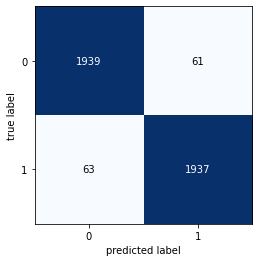

In [49]:
import matplotlib.pyplot as plt
plot_confusion_matrix(con_mat)
plt.savefig("plot_con.png")

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

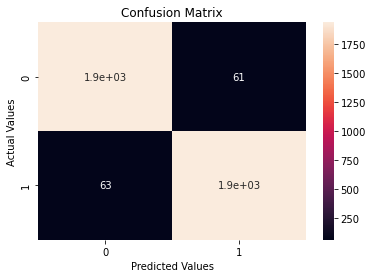

In [51]:
sns.heatmap(np.around(con_mat),annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")   
plt.savefig("confusion.png")

In [52]:
y_pred_test_prob = model.predict_proba(x_test)

In [53]:
class1_prob = y_pred_test_prob[:,1]

In [54]:
from sklearn.metrics import roc_curve

In [57]:
fpr,tpr,thesh=roc_curve(y_test,class1_prob)

In [58]:
thesh

array([1.99989253e+00, 9.99892531e-01, 9.99863728e-01, 9.99860152e-01,
       9.99825959e-01, 9.99822672e-01, 9.99806123e-01, 9.99801036e-01,
       9.99799600e-01, 9.99794341e-01, 9.99786501e-01, 9.99784959e-01,
       9.99749525e-01, 9.99742953e-01, 9.99731228e-01, 9.99727333e-01,
       9.99722184e-01, 9.99718159e-01, 9.99683776e-01, 9.99682406e-01,
       9.99659207e-01, 9.99654270e-01, 9.99647742e-01, 9.99642638e-01,
       9.99622011e-01, 9.99619283e-01, 9.99597309e-01, 9.99589706e-01,
       9.99577732e-01, 9.99569759e-01, 9.99567897e-01, 9.99536030e-01,
       9.99535004e-01, 9.99502473e-01, 9.99501043e-01, 9.99495266e-01,
       9.99456060e-01, 9.99450559e-01, 9.99429619e-01, 9.99425503e-01,
       9.99420135e-01, 9.99416336e-01, 9.99369195e-01, 9.99355440e-01,
       9.99340431e-01, 9.99338534e-01, 9.99332354e-01, 9.99330877e-01,
       9.99323132e-01, 9.99308373e-01, 9.99295319e-01, 9.99276838e-01,
       9.99243866e-01, 9.99238410e-01, 9.99225749e-01, 9.99209392e-01,
      

Text(0.5, 1.0, 'ROC CURVE')

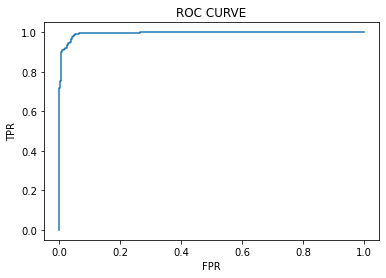

In [59]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC CURVE")

Text(0.5, 1.0, 'ROC CURVE')

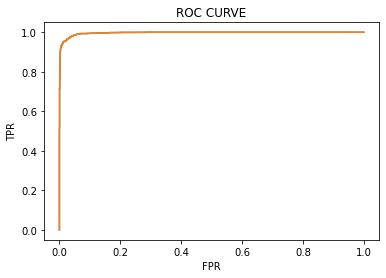

In [63]:
y_train_test_prob = model.predict_proba(x_train)
class1_prob1 = y_train_test_prob[:,1]
class1_prob1
fpr1,tpr1,thesh1 = roc_curve(y_train,class1_prob1)
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")